### Data science project -->
1. drill down and filter the reuired data tables from which we fetch data
2. Data analysis or EDA (most imp and covers 80 to 90 percent of the whole data science project lifecycle)
3. Model creaton and evaluation
4. Evaluation of your model and go back to step 2 if model performance is not up to mark

### EDA (Exploratory Data Analysis)
1. Used by data scientists to analyse and investigate data sets and summarise their main findings and characteristics.
2. They often use data visualization for concluding EDA process

### Why EDA is important ?
1. to get insights from the data
2. to handle and clean issues within the data eg. removing duplicates, fixing the Nan/missign values, etc
3. to find underlying problems and provide solutions using relationships b/w the data features

We beed to improve the data quality being fed to ML models as there is a famous saying in ML world :

"GARBAGE IN GARBAGE OUT"

In [ ]:
import pandas as pd

stu_dict = {"name" : ["Himanshu", "Himanshu", "Mahesh", "Seema"], "age" : [27, 27, "", "22"], "hrs_studied" : ['Nan', 'Nan', '20', "-12"], "marks_scored" : ['50', '50', '100', '70']}

df = pd.DataFrame(stu_dict)

In [7]:
df

,name,age,hrs_studied,marks_scored
0,Himanshu,27,Nan,50
1,Himanshu,27,Nan,50
2,Mahesh,,20,100
3,Seema,22,-12,70


 ## STEPS IN EDA
 1. Understand the shape of the data -> df.shape
 2. basic info about df -> columns, rows, non null values, datatype of each column -> df.info()
 3. Statistical summary of the df -> mean, median, mode, 25%, 75% etc -> mean.describe()
 4. Check for null values -> how many null values present, %age of null values per column
 5. check for duplicate values -> df.duplicated()
 6. Check for unique values in categorical columns -> df.unique()
 7. count the no of occurences of each category in a categorical column
 8. Treat the null values
 9. Treatment of duplicate values
 10. correlation -> df.corr()
 11. Outlier detection => and treatment of outliers
 12. encode the categorical columns

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_churn_data.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [9]:
# meaning of churn in the above data :
# churn means the customer who are moving out of our subscription i.e. end of relationship with the company


In [10]:
df.shape

(2000, 16)

In [11]:
# duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


In [12]:
df[df.duplicated()] # 0 rows that are duplicated

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [13]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [14]:
df[df.duplicated(subset='customer_id', keep = False)]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
917,2015,530490,343-7242,Female,34,59,no,yes,199.65,6.8,22.63,103,3,2.0,1,0.0
918,2015,530490,392-8905,Male,36,172,no,no,323.55,7.1,36.67,83,1,2.0,3,0.0


In [15]:
df.drop_duplicates(subset = "customer_id", inplace = True)
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [16]:
df.loc[915:920, :] # the first occurence is kept and the remaining duplicates are deleted
# in this example row 917 is kept and row 918 is deleted
# if we want to keep row 918 then we add a paramater df.drop_duplicates(subset = "customer_id", inplace = True, keep = "last")

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
915,2015,529554,346-5068,Male,43,172,no,no,430.65,14.4,48.81,98,2,4.0,3,NaN
916,2015,529637,405-4420,Male,52,80,yes,yes,238.95,11.9,27.08,82,5,4.0,1,0.0
917,2015,530490,343-7242,Female,34,59,no,yes,199.65,6.8,22.63,103,3,2.0,1,0.0
919,2015,530697,402-7626,Male,28,73,no,no,321.30,5.9,36.41,112,8,2.0,0,0.0
920,2015,530848,386-9177,Male,32,232,no,no,248.40,11.8,28.15,77,3,4.0,1,0.0


In [17]:
# Stakeholders want to know, how many female customers are there whose age is moore than the median age of the data?
df[(df['gender'] == 'Female') & (df['age'] > df['age'].median())]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
17,2015,107195,386-9981,Female,45,99,no,no,300.00,11.4,34.00,82,2,4.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2015,990984,341-1412,Female,42,73,no,no,382.05,10.6,43.30,60,8,3.0,0,0.0
1988,2015,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN


In [18]:
df['age'].median()

37.0

In [19]:
# find the top 10 customers based on weekly minutes watched?

top_20 = df.sort_values(by='weekly_mins_watched', ascending=False).head(20)
top_20

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1380,2015,722719,343-5709,Male,33,154,no,no,526.20,10.1,59.64,100,9,3.0,1,1.0
1523,2015,785175,345-9140,Male,31,64,yes,no,520.20,13.3,58.96,102,9,4.0,1,1.0
1261,2015,680762,370-9116,Male,33,83,no,no,506.10,15.8,57.36,114,7,5.0,0,1.0
1838,2015,929949,373-2053,Male,29,112,no,no,503.25,12.7,57.04,132,8,4.0,2,1.0
1126,2015,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,1.0
31,2015,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,1.0
283,2015,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,NaN,0,1.0
1936,2015,971483,378-3625,Female,37,208,no,no,489.75,10.7,55.51,102,6,3.0,2,1.0
348,2015,253793,335-1874,Female,29,87,no,no,483.75,9.4,54.83,128,4,3.0,2,1.0
43,2015,114709,333-7631,Female,41,80,no,no,483.45,6.7,54.79,123,8,2.0,0,1.0


In [20]:
# how many males and females in top 20 customers

top_20['gender'].value_counts()

,count
gender,
Male,11
Female,9


In [21]:
df.describe() # stats summary of numerical columns only by default

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1999.0,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1971.000000,1999.000000,1964.000000
mean,2015.0,554899.362181,38.691846,99.713857,270.151726,10.200250,30.617754,100.424212,4.484242,3.251142,1.546273,0.133401
std,0.0,261098.435117,10.208786,39.732453,80.562930,2.785353,9.130446,19.530452,2.487129,0.808798,1.315091,0.340094
min,2015.0,100198.000000,18.000000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328574.500000,32.000000,73.000000,218.175000,8.400000,24.730000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,568065.000000,37.000000,99.000000,269.850000,10.200000,30.580000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773721.500000,44.000000,126.500000,324.750000,12.000000,36.805000,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.000000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [22]:
df.describe(include='all') # use object for categorical only

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1999.0,1999.000000,1999,1975,1999.000000,1999.000000,1999,1999,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1971.000000,1999.000000,1964.000000
unique,NaN,NaN,1999,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,414-1496,Male,NaN,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1052,NaN,NaN,1801,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.0,554899.362181,NaN,NaN,38.691846,99.713857,NaN,NaN,270.151726,10.200250,30.617754,100.424212,4.484242,3.251142,1.546273,0.133401
std,0.0,261098.435117,NaN,NaN,10.208786,39.732453,NaN,NaN,80.562930,2.785353,9.130446,19.530452,2.487129,0.808798,1.315091,0.340094
min,2015.0,100198.000000,NaN,NaN,18.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328574.500000,NaN,NaN,32.000000,73.000000,NaN,NaN,218.175000,8.400000,24.730000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,568065.000000,NaN,NaN,37.000000,99.000000,NaN,NaN,269.850000,10.200000,30.580000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773721.500000,NaN,NaN,44.000000,126.500000,NaN,NaN,324.750000,12.000000,36.805000,114.000000,6.000000,4.000000,2.000000,0.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1999 non-null   int64  
 1   customer_id             1999 non-null   int64  
 2   phone_no                1999 non-null   object 
 3   gender                  1975 non-null   object 
 4   age                     1999 non-null   int64  
 5   no_of_days_subscribed   1999 non-null   int64  
 6   multi_screen            1999 non-null   object 
 7   mail_subscribed         1999 non-null   object 
 8   weekly_mins_watched     1999 non-null   float64
 9   minimum_daily_mins      1999 non-null   float64
 10  maximum_daily_mins      1999 non-null   float64
 11  weekly_max_night_mins   1999 non-null   int64  
 12  videos_watched          1999 non-null   int64  
 13  maximum_days_inactive   1971 non-null   float64
 14  customer_support_calls  1999 non-null   int64

In [24]:
# chunking strategy to read data with 1million rows
# you chunk the data in 20k rows, you run your EDA and keep appending data

# PySpark is always an option

# dask library to handle large datasets

In [25]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1999 non-null   int64  
 1   customer_id             1999 non-null   int64  
 2   phone_no                1999 non-null   object 
 3   gender                  1975 non-null   object 
 4   age                     1999 non-null   int64  
 5   no_of_days_subscribed   1999 non-null   int64  
 6   multi_screen            1999 non-null   object 
 7   mail_subscribed         1999 non-null   object 
 8   weekly_mins_watched     1999 non-null   float64
 9   minimum_daily_mins      1999 non-null   float64
 10  maximum_daily_mins      1999 non-null   float64
 11  weekly_max_night_mins   1999 non-null   int64  
 12  videos_watched          1999 non-null   int64  
 13  maximum_days_inactive   1971 non-null   float64
 14  customer_support_calls  1999 non-null   int64

In [27]:
df['churn'].value_counts(dropna=False)

,count
churn,
0.0,1702
1.0,262
NaN,35


In [28]:
# percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100

,0
year,0.000000
customer_id,0.000000
phone_no,0.000000
gender,1.200600
age,0.000000
no_of_days_subscribed,0.000000
multi_screen,0.000000
mail_subscribed,0.000000
weekly_mins_watched,0.000000
minimum_daily_mins,0.000000


In [29]:
# get the rows where churn value is null ?
df[df['churn'].isnull()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
81,2015,129137,335-7257,Female,36,92,no,yes,276.00,12.7,31.28,96,3,NaN,2,NaN
82,2015,129487,377-9178,Female,39,103,no,no,240.30,9.7,27.23,97,2,NaN,0,NaN
120,2015,148624,410-5713,Male,32,66,no,yes,262.05,8.9,29.70,98,2,3.0,1,NaN
121,2015,148676,370-7546,Male,37,87,no,no,235.20,7.6,26.66,77,6,3.0,1,NaN
156,2015,165361,380-8727,Female,37,99,no,no,173.25,11.5,19.64,98,7,4.0,7,NaN
157,2015,165883,358-9095,Female,28,128,no,no,356.85,13.9,40.44,68,4,4.0,1,NaN
194,2015,184762,357-1909,Male,31,151,yes,no,327.00,12.4,37.06,95,1,4.0,0,NaN
195,2015,184815,397-7500,Male,40,105,no,yes,211.80,11.4,24.00,101,2,4.0,1,NaN
228,2015,200466,374-1551,Male,38,80,no,no,177.15,8.2,20.08,86,6,3.0,1,NaN
290,2015,230769,366-7247,Male,60,93,yes,no,325.35,17.5,36.87,110,5,5.0,1,NaN


In [30]:
# drop the rows having missing values in churn
new_df = df.dropna(subset='churn').reset_index(drop=True) # resets index as dropna deletes rows but not align the index values

In [31]:
## duplicates removed and nan values in churn removed
new_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1960,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1961,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1962,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [32]:
new_df.isnull().sum()

,0
year,0
customer_id,0
phone_no,0
gender,24
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


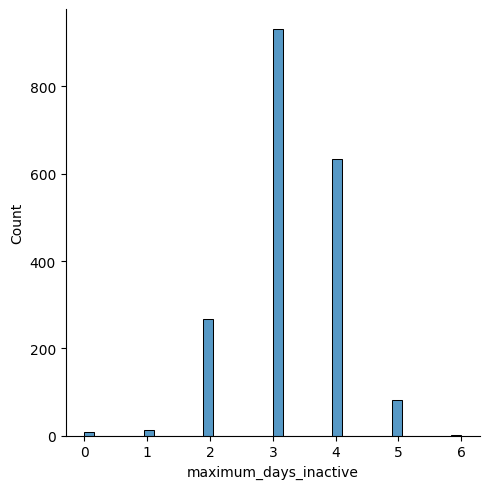

In [33]:
sns.displot(data=new_df, x = 'maximum_days_inactive')

In [34]:
new_df['maximum_days_inactive'].value_counts(dropna=False, normalize=True) * 100

,proportion
maximum_days_inactive,
3.0,47.403259
4.0,32.281059
2.0,13.645621
5.0,4.175153
NaN,1.323829
1.0,0.610998
0.0,0.458248
6.0,0.101833


In [35]:
new_df['maximum_days_inactive'].dtype

dtype('float64')

In [36]:
new_df['maximum_days_inactive'].describe()

,maximum_days_inactive
count,1938.000000
mean,3.250258
std,0.805128
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,6.000000


In [37]:
new_df['maximum_days_inactive'].median()

3.0

In [38]:
new_df['maximum_days_inactive'].fillna(new_df['maximum_days_inactive'].median(), inplace = True)

/tmp/ipython-input-1117815183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['maximum_days_inactive'].fillna(new_df['maximum_days_inactive'].median(), inplace = True)


In [39]:
new_df.isnull().sum()

,0
year,0
customer_id,0
phone_no,0
gender,24
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


In [40]:
new_df['gender'].value_counts()

,count
gender,
Male,1031
Female,909


In [41]:
new_df['gender'].mode()[0]

'Male'

In [42]:
new_df.fillna({'gender':new_df['gender'].mode()[0]}, inplace=True)

In [43]:
new_df.loc[4:22, :]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,Male,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,3.0,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0
10,2015,103697,411-9554,Male,34,114,no,yes,338.70,8.4,38.39,100,9,3.0,4,0.0
11,2015,103738,392-5296,Male,34,107,no,no,201.00,7.3,22.78,79,3,2.0,3,0.0
12,2015,104025,380-6722,Female,30,84,no,no,112.95,12.3,12.80,134,1,4.0,1,0.0
13,2015,104904,337-1151,Female,23,142,no,no,218.10,10.9,24.72,96,1,3.0,1,0.0


In [44]:
new_df.isnull().sum()

,0
year,0
customer_id,0
phone_no,0
gender,0
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


In [45]:
new_df.churn.value_counts(normalize=True)

,proportion
churn,
0.0,0.866599
1.0,0.133401


In [46]:
# how to decide when to use mean, median or mode?
# mode for categorical column
# mean median is used for numerical column

## how to use decide b/w mean and median?
# if the data is skewed, we use median else mean because mean gets impacted by outliers

/tmp/ipython-input-2757909618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a)


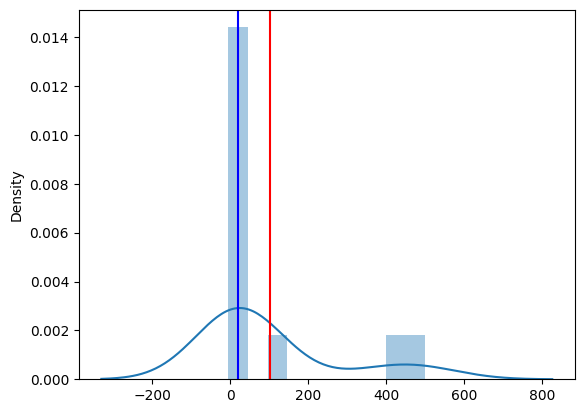

In [47]:
a = [-5, 10, 12, 13, 15, 20, 30, 38, 100, 400, 500]
b = [-500, -300, -200, -150, -250, -100, 10, 12, 13, 15, 20, 30, 38]
sns.distplot(a)
plt.axvline(np.mean(a), color='red')
plt.axvline(np.median(a), color='blue')
# plt.legend()

/tmp/ipython-input-3396622086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b)


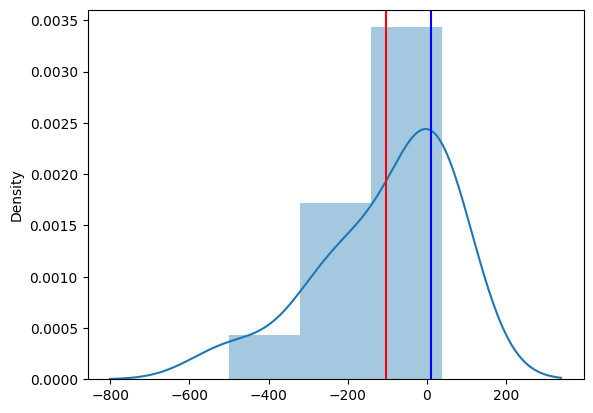

In [48]:
sns.distplot(b)
plt.axvline(np.mean(b), color='red')
plt.axvline(np.median(b), color='blue')

In [49]:
# the above is an imbalanced dataset and we can handle it using upsampling
# the most common way of handling imbalance in the data is by using SMOTE(Synthetic Minority Over-Sampling Technique)
# https://www.geeksforgeeks.org/machine-learning/what-is-imbalanced-dataset/

## Label Encoding for Categorical Variables

gender, multi_screen, mail_subscribed

In [54]:
def label_encoding(col_name):
  uni_col_values = new_df[col_name].unique().tolist()
  d = {}
  for i, val in enumerate(uni_col_values):
    d[val] = i
  new_df[f"encoded_{col_name}"] = new_df[col_name].map(d)

In [55]:
for i in ['gender', 'multi_screen', 'mail_subscribed']:
  label_encoding(i)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['gender', 'multi_screen', 'mail_subscribed']:
  new_df[f"le_{col}"] = le.fit_transform(new_df[col])

In [60]:
new_df.isnull().sum()

,0
year,0
customer_id,0
phone_no,0
gender,0
age,0
no_of_days_subscribed,0
multi_screen,0
mail_subscribed,0
weekly_mins_watched,0
minimum_daily_mins,0


In [65]:
x = new_df.drop(['year', 'customer_id', 'phone_no', 'gender', 'churn', 'le_gender', 'le_mail_subscribed', 'le_multi_screen', 'multi_screen', 'mail_subscribed'], axis = 1) # le_col was just used to test LabelEncoder but it has similar method to the function we wrote
y = new_df['churn']

In [66]:
x

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,encoded_gender,encoded_multi_screen,encoded_mail_subscribed
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1959,42,119,176.70,7.6,20.03,76,3,3.0,3,0,0,1
1960,45,127,273.45,9.3,30.99,116,3,3.0,1,1,0,0
1961,53,94,128.85,15.6,14.60,110,16,5.0,0,1,0,0
1962,40,94,178.05,10.4,20.18,100,6,3.0,3,1,0,0


There was a total of 1964 rows where 1702 were 0(non churn) and 262 are 1(churn)

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority") # sampling strategy is how you want the sampling to take place either minority, majority or all

In [68]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [69]:
x_resampled.shape

(3404, 12)

In [71]:
y_resampled.value_counts()

,count
churn,
0.0,1702
1.0,1702


In [75]:
x_resampled.reset_index()

,index,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,encoded_gender,encoded_multi_screen,encoded_mail_subscribed
0,0,36,62,148.350000,12.200000,16.810000,82,1,4.000000,1,0,0,0
1,1,39,149,294.450000,7.700000,33.370000,87,3,3.000000,2,0,0,0
2,2,65,126,87.300000,11.900000,9.890000,91,1,4.000000,5,0,0,0
3,3,24,131,321.300000,9.500000,36.410000,102,4,3.000000,3,0,0,1
4,4,40,191,243.000000,10.900000,27.540000,83,7,3.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,3399,43,84,226.231570,14.100245,25.640960,103,2,4.073230,3,0,0,0
3400,3400,37,105,331.252316,13.107272,37.542761,101,5,4.000000,1,1,0,0
3401,3401,29,30,344.460525,10.315797,39.038070,105,1,3.000000,0,0,0,0
3402,3402,50,139,293.034252,9.051302,33.211147,93,3,2.566956,2,1,0,0


### Creating different models

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split

When splitting the data always make sure you split the data first and then use any algo over train and test separately, eg. even if it is SMOTE or any ML algo

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [94]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

In [95]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [96]:
rf1.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [97]:
y_pred1 = rf1.predict(x_test)

In [98]:
acc = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)

print("Accuracy : ", acc)
print("Precision : ", precision)
print("Recall : ", recall)
print(cm)

Accuracy :  0.9
Precision :  0.6363636363636364
Recall :  0.5454545454545454
[[489  24]
 [ 35  42]]


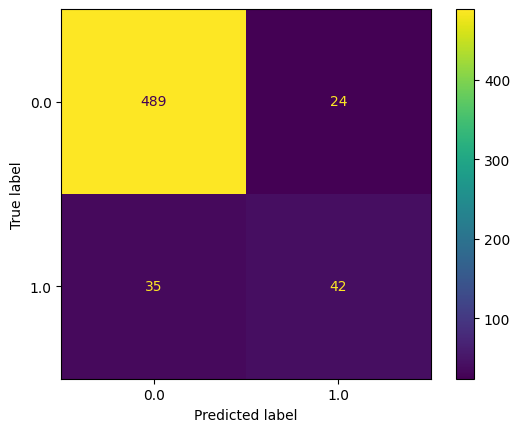

In [100]:
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf1.classes_)
dis.plot()
plt.show()

Random Forest using KFold

In [88]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf, x_resampled, y_resampled, cv = kfold)

In [89]:
y_pred.shape

(3404,)

In [91]:
acc = accuracy_score(y_resampled, y_pred)
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
cm = confusion_matrix(y_resampled, y_pred)

print("Accuracy : ", acc)
print("Precision : ", precision)
print("Recall : ", recall)
print(cm)

Accuracy :  0.9294947121034077
Precision :  0.9366786140979689
Recall :  0.9212690951821386
[[1596  106]
 [ 134 1568]]
